# 7.1.0 Sequential Model vs Functioal API

1. Sequential Model
    1. 네트워크의 입력과 출력이 하나라고 가정
    2. 층을 차례대로 쌓아 구성
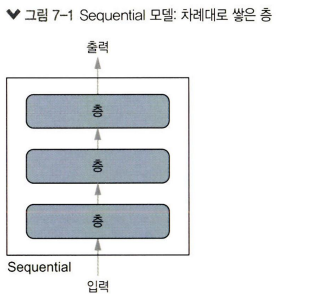

2. 다중 모델
    1. 다중 입력 모델
    - (메타데이터, 텍스트 설명, 사진) -> (가격) 예측
    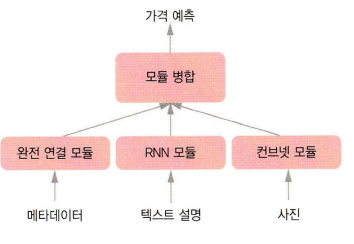
    
    2. 다중 출력 모델 
    - (소설 텍스트) -> (분류, 회귀) 예측
    - 통계적으로 독립적이지 않기 때문에 동시에 훈련해야 더 좋은 모델을 만들 수 있음
    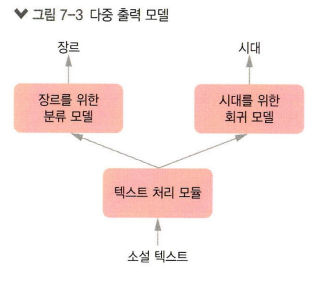
    
    3. 네트워크 토폴로지(topology)
    - 비순환 유향 그래프 구조
    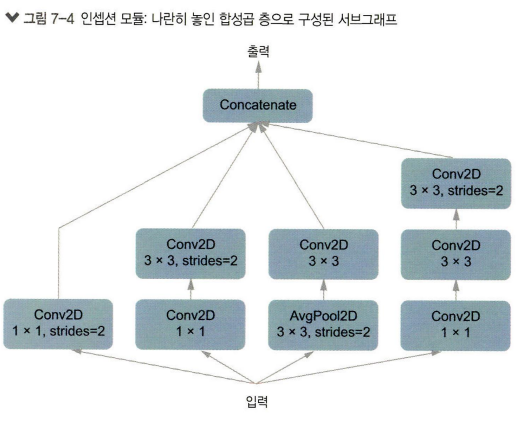
    
    4. 잔차 연결
    - 하위 층의 출력 텐서를 상위 층의 출력 텐서에 더함으로써 하위 층에서 학습된 정보가 데이터 처리 과정에서 손실되는 것을 방지
    - 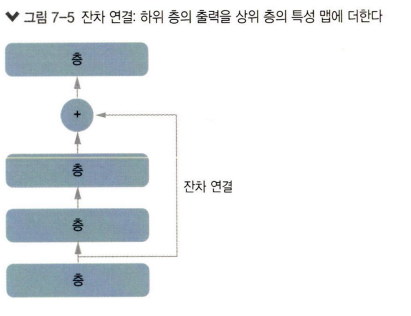
    - Example: ResNet
        - 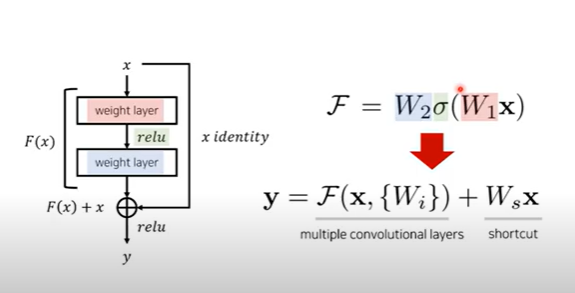
        - 미분시 상수값이 남아 최소 1 이상의 값이 나오게 되므로 gradient vanishing 완화 가능
        - reference: https://www.youtube.com/watch?v=iadEDPoEME8

# 7.1.1 함수형 API 소개

함수처럼 층을 사용하여 텐서의 입출력을 다루기 때문에 함수형 API라고 부름

Functional API Example

```python
from keras import Input, layers

input_tensor = Input(shape=(32,))
dense = layers.Dense(32, activation='relu) #making layer dense to use as function
                     
output_tensor = dense(input_tensor)
```

In [3]:
#Sequneital Model vs Functional API

from keras.models import Sequential, Model
from keras import layers
from keras import Input

#Sequential Model
seq_model = Sequential()
seq_model.add(layers.Dense(32, activation='relu', input_shape=(64,)))
seq_model.add(layers.Dense(32, activation='relu'))
seq_model.add(layers.Dense(10, activation='softmax'))

#Functional API Model
input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
ouput_tensor = layers.Dense(10, activation='softmax')(x)

model = Model(input_tensor, ouput_tensor)
model.summary()

seq_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None,

Compile, Training, Evaluate for Functional API
```python
model.compile(optimizer='rmsprop', loss='categorycal_crossentropy')
inport numpy as np
x_train = np.random.random((1000, 64))
y_train = np.random.random((1000, 10))

model.fit(x_train, y_train, epochs = 10, batch_size = 128)
score = model.evaluate(x_train, y_train)
```

# 7.1.2 다중 입력 모델

Example - Question&Answering Model
1. (자연어, 답변에 필요한 정보가 담겨있는 텍스트) 입력값
2. 가장 간단한 구조는 미리 정의한 어휘 사전에서 소프트맥스 함수로 한 단어로 된 답을 출력하는 것
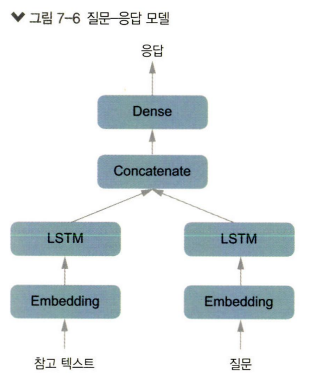
3. Functional API를 사용하여 구현

In [6]:
#2개의 입력을 가진 질문-응답 모델의 함수형 API 구현하기

from keras.models import Model
from keras import layers
from keras import Input

text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

#Text
text_input = Input(shape=(None,), dtype = 'int32', name='text')
embedded_text = layers.Embedding(text_vocabulary_size, 64)(text_input) #imbedding input to sequence of vector
encoded_text = layers.LSTM(32)(embedded_text)

#Question
question_input = Input(shape=(None,), dtype = 'int32', name='question')
embedded_question = layers.Embedding(question_vocabulary_size, 32)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)

#Connecting Encoded text and question
concatenated = layers.concatenate([encoded_text, encoded_question], axis = 1)

answer = layers.Dense(answer_vocabulary_size, activation='softmax')(concatenated)

model = Model([text_input, question_input], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [7]:
#다중 입력 모델에 데이터 주입하기

import numpy as np
from keras.utils import to_categorical

num_samples = 1000
max_length = 100

text = np.random.randint(1, text_vocabulary_size, size = (num_samples, max_length))
question = np.random.randint(1, question_vocabulary_size, size = (num_samples, max_length))
answers = np.random.randint(0, answer_vocabulary_size, size = num_samples)

answers = to_categorical(answers)

#model.fit([text, question], answers, epochs=10, batch_size = 128) # List Insert
model.fit({'text': text, 'question': question}, answers, epochs=10, batch_size=128) #Dictionary Insert

Epoch 1/10
8/8 [==============================] - 4s 63ms/step - loss: 6.2150 - acc: 0.0020
Epoch 2/10
8/8 [==============================] - 0s 58ms/step - loss: 6.1974 - acc: 0.0300
Epoch 3/10
8/8 [==============================] - 0s 54ms/step - loss: 6.1412 - acc: 0.0060
Epoch 4/10
8/8 [==============================] - 0s 54ms/step - loss: 6.0734 - acc: 0.0100
Epoch 5/10
8/8 [==============================] - 0s 51ms/step - loss: 6.0167 - acc: 0.0070
Epoch 6/10
8/8 [==============================] - 0s 52ms/step - loss: 5.9280 - acc: 0.0080
Epoch 7/10
8/8 [==============================] - 0s 51ms/step - loss: 5.8213 - acc: 0.0160
Epoch 8/10
8/8 [==============================] - 0s 52ms/step - loss: 5.7300 - acc: 0.0260
Epoch 9/10
8/8 [==============================] - 0s 54ms/step - loss: 5.6571 - acc: 0.0410
Epoch 10/10
8/8 [==============================] - 0s 53ms/step - loss: 5.5870 - acc: 0.0490


# 7.1.3 다중 출력 모델

In [10]:
#3개의 출력을 가진 함수형 API 구현하기

vocabulary_size = 50000
num_income_groups = 10

posts_input = Input(shape=(None,), dtype = 'int32', name='posts')
embedded_posts = layers.Embedding(vocabulary_size, 256)(posts_input)
x = layers.Conv1D(128, 5, activation='relu')(embedded_posts)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x)

age_prediction = layers.Dense(1, name = 'age')(x)
income_prediction = layers.Dense(num_income_groups, activation='softmax', name='income')(x)
gender_prediction = layers.Dense(1, activation='sigmoid', name = 'gender')(x)

model = Model(posts_input, [age_prediction, income_prediction, gender_prediction])

1. 훈련 방식
    1. 네트워크 출력마다 다른 손실 함수를 지정해야함(Ex. 스칼라 회귀, 이진 클래스 분류 등)
    2. 하지만 경사 하강법은 하나의 스칼라 값만 최소화하기에 계산된 각각의 손실값들을 하나의 값으로 합쳐 훈련 진행

In [12]:
#다중 출력 모델의 컴파일 옵션: 다중 손실, 손실 가중치
model.compile(optimizer='rmsprop',loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'], loss_weights=[0.25, 1., 10.])

# 7.1.4 층으로 구성된 비순환 유향 그래프

1. 인셉션 모듈(Inception) = GoogLeNet
    1. 모듈을 각각 쌓아 독립된 작은 네트워크처럼 구성 후 마지막에 전체 출력 특성을 합침
    2. 네트워크가 따로 공각 특성과 채널 방향을 학습하도록 돕기에 한번에 학습하는 것보다 효과가 높음
    3. 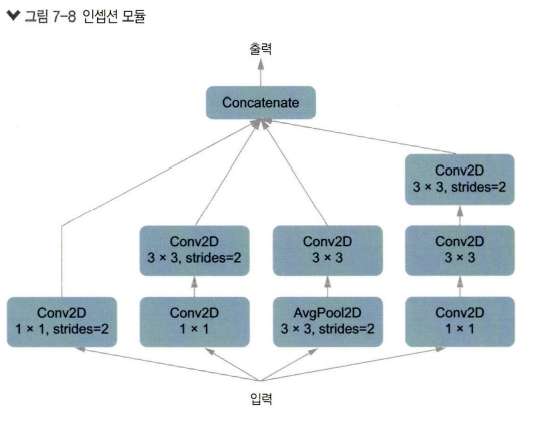
    4. 상단 이미지의 모듈 구현 예시 코드
    ```python
    from keras import layers
    
    branch_a = layers.Conv2D(128, 1, activation='relu', strides=2)(x) #출력 크기를 하나로 만들어 합치기 위해 모두 stride 2 사용

    branch_b = layers.Conv2D(128, 1, activation='relu')(x)
    branch_b = layers.Conv2D(128, 3, activation='relu', strides=2)(branch_b)

    branch_c = layers.AveragePooling2D(3, strides=2)(x)
    branch_c = layers.Conv2D(128, 3, activation='relu', strides=2)(branch_c)

    branch_d = layers.Conv2D(128, 1, activation='relu')(x)
    branch_d = layers.Conv2D(128, 3, activation='relu')(branch_d)
    branch_d = layers.Conv2D(128, 3, activation='relu', strides=2)(branch_d)
 
    output = layers.concatenate([branch_a, branch_b, branch_c, branch_d], axis = 1) #모든 가지의 출력을 연결하여 모듈의 출력을 만듦
    ```

2. 잔차 연결(residual connection)
    1. Resolved vanishing gradient and representational bottleneck problems
    2. 특성 맵의 크기가 같을 때 원본을 그대로 사용하는 잔차 연결 코드
    ```python
    from keras import layers

    x = ...
    y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
    y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)
    y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)

    y = layers.add([y, x]) # 원본 x를 출력 특성에 더함
    ```
    3. 특성 맵의 크기가 다를 때 선형 변환을 사용하여 잔차 연결을 구현한 코드
    ```python
    from keras import layers

    x = ...
    y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
    y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)
    y = layers.MaxPooling2D(2, strides=2)(y)
    
    residual = layers.Conv2D(128, 1, strides = 2, padding='same')(x) #y와 크기를 맞추기 위해 1x1 합성곱을 사용해 x를 down sampling
    
    y = layers.add([y, residual])
    ```

# 7.1.5 층 가중치 공유

1. 함수형 API는 층 객체를 여러 번 재사용 가능하기에 같은 가중치를 공유하고 같은 연산을 수행하는 게 가능
2. 샴 LSTM(Siamese LSTM) or 공유 LSTM
3. 공유 층 모델 코드 예시
    ```python
    from keras import layers
    from keras import Input
    from keras.models import Model
    
    lstm = layers.LSTM(32) #LSTM 층 객체 생성
    left_input = Input(shape=(None, 128)) #모델의 왼쪽 가지
    left_output = lstm(left_input)

    right_input = Input(shape=(None, 128)) #모델의 오른쪽 가지
    right_output = lstm(right_input)

    merged = layers.concatenate([left_output, right_output], axis=-1) #맨 위에 분류기를 놓음
    predictions = layers.Dense(1, activation='sigmoid')(merged)

    model = Model([left_input, right_input], predictions)
    model.fit([left_input, right_input], targets)
    ```

# 7.1.6 층과 모델

1. Functional API에서는 모델을 층처럼 사용 가능
2. 층 객체를 호출할 때와 동일하게 모델 객체를 호출하면 모델의 가중치가 재사용됨
3. 공유 합성곱 기반 층 구현 코드 예시
    ```python
    from keras import layers
    from keras import applications
    from keras import Input

    xception_base = applications.Xception(weights=None, include_top=False)

    left_input = Input(shape=(250, 250, 3))
    right_input = Input(shape=(250, 250, 3))

    left_features = xception_base(left_input) #같은 비전 모델 두 번 호출
    right_features = xception_base(right_input)

    merged_features = layers.concatenate([left_features, right_features], axis=-1)
    ```